In [89]:
import pandas as pd
%matplotlib inline

# loading and printing out first 5 items of the data
data = pd.read_csv( 'CrimePreprocessed.csv' )
data.head()

#range of Time of Day is:
    # 0000-0600
    # 0600-1200
    # 1200-1800
    # 1800-2359

,Date,Location,Time of Day,Day of Week,Number of Crimes
0,1/1/19,77th Street,0,Weekday,0
1,1/1/19,77th Street,600,Weekday,2
2,1/1/19,77th Street,1200,Weekday,2
3,1/1/19,77th Street,1800,Weekday,6
4,1/1/19,Devonshire,0,Weekday,1


In [90]:
y = data['Day of Week']
X = data.drop('Day of Week',axis=1)
X = X.drop('Date',axis=1)

In [91]:
from sklearn.model_selection import train_test_split

X = X.drop('Location',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3 , random_state=1)

Best hyperparameter, k = 25
Test Accuracy = 0.7586206896551724


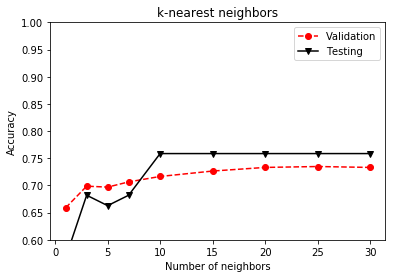

In [95]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.metrics import accuracy_score

numNeighbors = [1,3,5,7,10,15,20,25,30]
validationAcc = np.zeros(len(numNeighbors))
testAcc = np.zeros(len(numNeighbors))
index = 0

np.random.seed(1)
for nn in numNeighbors:
    clf = KNeighborsClassifier( n_neighbors=nn )
    scores = cross_val_score( clf, X_train, y_train, cv=10 )
    validationAcc[index] = np.mean(scores)
    clf.fit( X_train, y_train  )
    Y_predTest = clf.predict( X_test )
    testAcc[index] = accuracy_score( y_test, Y_predTest )
    index += 1
    
plt.plot(numNeighbors, validationAcc, 'ro--', numNeighbors, testAcc, 'kv-')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('k-nearest neighbors')
plt.legend(['Validation','Testing'])
plt.ylim([0.6,1.0])

bestHyperparam = np.argmax(validationAcc)
print('Best hyperparameter, k =', numNeighbors[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])

In [96]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

numEstimators = 500
np.random.seed(1)
clf = ensemble.RandomForestClassifier( n_estimators=numEstimators )
clf.fit( X_train, y_train )
y_pred = clf.predict( X_test )
print('Test Accuracy =', accuracy_score( y_test, y_pred ))

Test Accuracy = 0.7586206896551724


(array([104., 595., 110.,   0.,  31.,  24.,   0.,   1.,   2.,   1.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

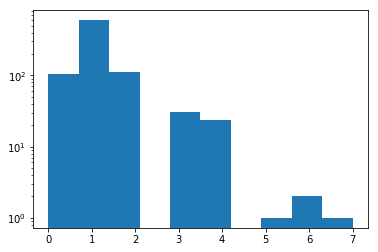

In [6]:
# detecting outliers detect outliers in the dataset 
# based on the distance to the 100th nearest neighbors of each data instance

from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

%matplotlib inline

knn = 100
nbrs = NearestNeighbors(n_neighbors=knn+1).fit(X)
distances, indices = nbrs.kneighbors(X)
ax = plt.axes(yscale='log')
ax.hist(distances[:,knn])

In [11]:
outlier = np.flipud(np.argsort(distances[:,knn]))
sort_dist = np.flipud(np.sort(distances[:,knn]))

p = pd.DataFrame(np.column_stack((outlier,sort_dist)),columns=['index','score'])
p.head()

,index,score
0,443.0,7.0
1,522.0,6.0
2,191.0,6.0
3,795.0,5.0
4,79.0,4.0


Area under ROC = 0.5292


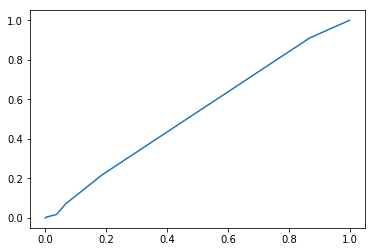

In [12]:
from sklearn.metrics import roc_curve, auc
%matplotlib inline

true_labels = (y == 'Weekend')

fpr, tpr, thresholds = roc_curve(true_labels, distances[:,knn])
roc_auc = auc( fpr,tpr )
plt.plot(fpr, tpr)
print('Area under ROC = %.4f' % (roc_auc))

In [98]:
from surprise import Dataset
from surprise import Reader

import pandas as pd

data = pd.read_csv( 'CrimePreprocessed.csv')

reader = Reader(line_format='user item rating', sep=',', rating_scale=(0,10))
data = Dataset.load_from_df(data[['Location', 'Day of Week', 'Number of Crimes']], reader=reader)
data.raw_ratings[:5]

[('77th Street', 'Weekday', 1.0, None),
 ('77th Street', 'Weekday', 3.0, None),
 ('77th Street', 'Weekday', 3.0, None),
 ('77th Street', 'Weekday', 7.0, None),
 ('Devonshire', 'Weekday', 2.0, None)]

In [99]:
from surprise import NMF
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.5, random_state=1 )

algo = NMF( n_factors=20, n_epochs=200, random_state=1 )
algo.fit( trainset )

In [100]:
from surprise import accuracy

pred = algo.test( testset )
accuracy.rmse( pred ), accuracy.mae( pred )

RMSE: 1.5634
MAE:  1.2055


(1.5633928119011977, 1.2055317517819069)

In [102]:
for i in range(10):
    print(pred[i])

user: Southwest  item: Weekend    r_ui = 1.00   est = 1.89   {'was_impossible': False}
user: Southwest  item: Weekend    r_ui = 4.00   est = 1.89   {'was_impossible': False}
user: West LA    item: Weekday    r_ui = 0.00   est = 0.87   {'was_impossible': False}
user: West LA    item: Weekday    r_ui = 0.00   est = 0.87   {'was_impossible': False}
user: Southwest  item: Weekend    r_ui = 1.00   est = 1.89   {'was_impossible': False}
user: Pacific    item: Weekday    r_ui = 2.00   est = 1.35   {'was_impossible': False}
user: West LA    item: Weekday    r_ui = 1.00   est = 0.87   {'was_impossible': False}
user: West LA    item: Weekday    r_ui = 0.00   est = 0.87   {'was_impossible': False}
user: Devonshire item: Weekend    r_ui = 2.00   est = 1.66   {'was_impossible': False}
user: Hollywood  item: Weekday    r_ui = 0.00   est = 1.29   {'was_impossible': False}


In [103]:
from surprise import Dataset
from surprise import Reader

import pandas as pd

data = pd.read_csv( 'CrimePreprocessed.csv')

reader = Reader(line_format='user item rating', sep=',', rating_scale=(0,10))
data2 = Dataset.load_from_df(data[['Location', 'Time of Day', 'Number of Crimes']], reader=reader)
data2.raw_ratings[:5]

[('77th Street', 0, 1.0, None),
 ('77th Street', 600, 3.0, None),
 ('77th Street', 1200, 3.0, None),
 ('77th Street', 1800, 7.0, None),
 ('Devonshire', 0, 2.0, None)]

In [104]:
from surprise import NMF
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data2, test_size=0.5, random_state=1 )

algo = NMF( n_factors=20, n_epochs=200, random_state=1 )
algo.fit( trainset )

In [105]:
from surprise import accuracy

pred = algo.test( testset )
accuracy.rmse( pred ), accuracy.mae( pred )

RMSE: 1.3273
MAE:  1.0375


(1.3273344441671646, 1.0375237509031103)

In [106]:
#range of Time of Day is:
    # 0000-0600
    # 0600-1200
    # 1200-1800
    # 1800-2359

for i in range(10):
    print(pred[i])

user: Southwest  item: 600        r_ui = 1.00   est = 1.40   {'was_impossible': False}
user: Southwest  item: 1800       r_ui = 4.00   est = 3.21   {'was_impossible': False}
user: West LA    item: 600        r_ui = 0.00   est = 0.60   {'was_impossible': False}
user: West LA    item: 0          r_ui = 0.00   est = 0.37   {'was_impossible': False}
user: Southwest  item: 0          r_ui = 1.00   est = 1.03   {'was_impossible': False}
user: Pacific    item: 600        r_ui = 2.00   est = 0.84   {'was_impossible': False}
user: West LA    item: 1200       r_ui = 1.00   est = 1.28   {'was_impossible': False}
user: West LA    item: 600        r_ui = 0.00   est = 0.60   {'was_impossible': False}
user: Devonshire item: 1800       r_ui = 2.00   est = 2.45   {'was_impossible': False}
user: Hollywood  item: 600        r_ui = 0.00   est = 0.67   {'was_impossible': False}
